In [1]:
from utils import FishEyeImage, rot
from photutils.detection import find_peaks, DAOStarFinder
from photutils.aperture import CircularAperture
from astropy.coordinates import angular_separation, position_angle, offset_by, SkyCoord
from astropy.table import Table, vstack
from astropy.stats import sigma_clipped_stats
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u


2024-05-31 09:46:55,138:tetra3.Tetra3-INFO: Loading database from: c:\Users\mlang\anaconda3\Lib\site-packages\tetra3\data\default_database.npz


In [2]:

hips_star = Table.read('hip2.fits')

file = 'IMG_8814'

pic = FishEyeImage(file+'.jpg', file+'.CR3')

solution = pic.solve(solve_size=1200)

{'RA': 118.41849225024492, 'Dec': 44.45471209203223, 'Roll': 317.497525846909, 'FOV': 28.40096774281282, 'distortion': -0.008960927971853215, 'RMSE': 208.0028699531976, 'Matches': 26, 'Prob': 1.0193527449677233e-48, 'epoch_equinox': 2000, 'epoch_proper_motion': 2023.0, 'T_solve': 14.708100003190339, 'T_extract': 57.59119999129325}


In [3]:
np.where(np.arange(0,10,0.1)<=3)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
       dtype=int64),)

In [4]:
pic.detect_stars()
pic.detect_stars_eq()
idx, d2d, d3d=pic.first_match()

c:\Users\mlang\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


(array([ 40., 185., 578., 407., 315., 262.,  49.,   3.,  10.,   7.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

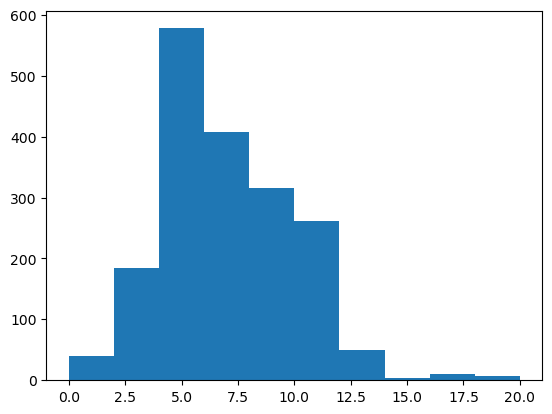

In [5]:
plt.hist(d2d.to(u.arcmin),range=[0*u.arcmin,20*u.arcmin])

In [6]:
sep = d2d[d2d.to(u.arcmin) < 20*u.arcmin].to(u.arcsec).value
np.sqrt(np.mean(sep**2))

457.2768361643909

In [13]:
init , final = pic.plate_optimize(ra_dec_range=3, roll_range=5,f_range=0.8,k_range=0.2,)
print(init)
print('mini:')
print(final)

[2.066792585014163, 0.7758810940320989, 5.541377192964361, 14.6, -0.19]
mini:
  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 231.92393882156395
        x: [ 2.067e+00  7.773e-01  5.542e+00  1.454e+01 -1.377e-01]
      nit: 20
      jac: [-3.009e-02  1.915e-01  1.512e-01 -5.346e-02 -2.755e-02]
     nfev: 162
     njev: 27
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>


In [8]:
final.x


array([ 2.06652934,  0.77725798,  5.54192126, 14.54231834, -0.13767568])

In [14]:
[  2.06680461   0.77584576   5.54119041 -95.62735801  -0.21004079]

-105.6273580054226

In [9]:
np.log2(1/15)+3

-0.9068905956085187

In [10]:
16*np.power(2, (-np.arange(52)*1/3))

array([1.60000000e+01, 1.26992084e+01, 1.00793684e+01, 8.00000000e+00,
       6.34960421e+00, 5.03968420e+00, 4.00000000e+00, 3.17480210e+00,
       2.51984210e+00, 2.00000000e+00, 1.58740105e+00, 1.25992105e+00,
       1.00000000e+00, 7.93700526e-01, 6.29960525e-01, 5.00000000e-01,
       3.96850263e-01, 3.14980262e-01, 2.50000000e-01, 1.98425131e-01,
       1.57490131e-01, 1.25000000e-01, 9.92125657e-02, 7.87450656e-02,
       6.25000000e-02, 4.96062829e-02, 3.93725328e-02, 3.12500000e-02,
       2.48031414e-02, 1.96862664e-02, 1.56250000e-02, 1.24015707e-02,
       9.84313320e-03, 7.81250000e-03, 6.20078536e-03, 4.92156660e-03,
       3.90625000e-03, 3.10039268e-03, 2.46078330e-03, 1.95312500e-03,
       1.55019634e-03, 1.23039165e-03, 9.76562500e-04, 7.75098170e-04,
       6.15195825e-04, 4.88281250e-04, 3.87549085e-04, 3.07597913e-04,
       2.44140625e-04, 1.93774542e-04, 1.53798956e-04, 1.22070312e-04])

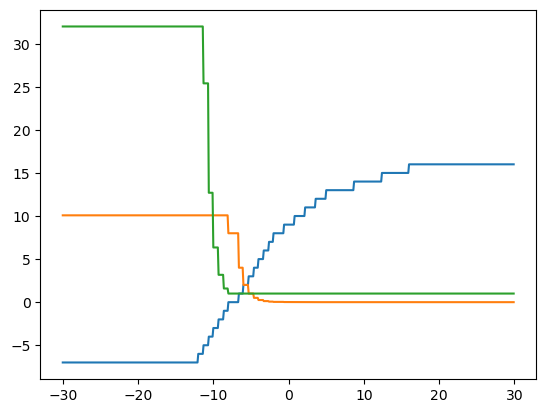

In [11]:
from astropy.coordinates import get_sun
from astropy.coordinates import EarthLocation, AltAz
from astropy.time import Time
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
# from astropy.utils.iers import conf
# conf.auto_max_age = None

sun_alts = [-12, -2, 5, 16]
evs = [-7, 8, 13, 16]


def sun2ev(sun_alt):
    # sun_alt=sun_alt_input.value
    if sun_alt < -12:
        return -7
    elif sun_alt < -2:
        return -7+(8+7)/(12-2)*(sun_alt+12)
    elif sun_alt < 5:
        return 8+(13-8)/(5+2)*(sun_alt+2)
    elif sun_alt<16:
        return 13+(16-13)/(16-5)*(sun_alt-5)
    else:
        return 16
    
tv_keys = ['15"','13"', '10"', '8"', '6"', '5"', '4"', '3"2', '2"5', '2"', '1"6', '1"3', '1"', '0"8', '0"6', '0"5', '0"4', '0"3', '1/4', '1/5', '1/6', '1/8', '1/10', '1/13', '1/15', '1/20', '1/25', '1/30', '1/40', '1/50',
           '1/60', '1/80', '1/100', '1/125', '1/160', '1/200', '1/250', '1/320', '1/400', '1/500', '1/640', '1/800', '1/1000', '1/1250', '1/1600', '1/2000', '1/2500', '1/3200', '1/4000', '1/5000', '1/6400', '1/8000']

tv_values = 16*np.power(2, (-np.arange(52)*1/3))

tv_dict = dict(zip(tv_keys, tv_values))

iso_keys = ['100', '125', '160', '200', '250', '320', '400', '500', '640', '800', '1000', '1250', '1600', '2000', '2500', '3200']

iso_values = 100*np.power(2, (np.arange(16)*1/3))

iso_dict = dict(zip(iso_keys, iso_values))

def find_nearest_key(dic, target):
    return min(dic.keys(), key=lambda k: abs(dic[k] - target))

def meter(ev,max_tv):
    max_tv_key = find_nearest_key(tv_dict, max_tv)
    max_tv = tv_dict[max_tv_key]
    max_iso100_ev = np.log2(1/max_tv)+3
    if ev >= max_iso100_ev:
        tv = max_tv*2**(max_iso100_ev-ev)
        iso = 100
        tv = find_nearest_key(tv_dict, tv)
        tv = tv_dict[tv]
    else:
        tv = max_tv
        iso = 100*2**(max_iso100_ev-ev)
        iso = find_nearest_key(iso_dict, iso)
        iso = iso_dict[iso]
    return tv, iso

# lat = 40.071996
# lon = 114.316539
# height = 500

# cam_loc = EarthLocation(lat=lat*u.deg, lon=lon*u.deg, height=height*u.m)
# time_loc = Time.now()
# # delta_midnight = np.linspace(0, 3, 500)*u.hour
# # times = time_loc+delta_midnight

# frame = AltAz(obstime=time_loc,location=cam_loc)
# sun_altazs = get_sun(time_loc).transform_to(frame)
# sun_alt = sun_altazs.alt

sun2ev = np.vectorize(sun2ev)
meter = np.vectorize(meter)
sunalts = np.arange(-30,30,0.1)
plt.plot(sunalts,sun2ev(sunalts))
tv, iso =meter(sun2ev(sunalts),10)
plt.plot(sunalts,tv)
plt.plot(sunalts,iso/100)

